<a href="https://colab.research.google.com/github/Mainabryan/agriculture_yield_model/blob/main/agriculture_yield_datset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###                                              USING MULTILINEAR REGRESSION

##Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#Load the datset

In [2]:
data = pd.read_csv('/content/agriculture_yield_dataset.csv')

#EDA

In [3]:
data.head()

,Month,Region,Crop Type,Rainfall (mm),Fertilizer Used (kg),Pesticide Usage (L),Temperature (°C),Soil Type,Market Access (%),Crop Yield (tons)
0,7,Nyanza,Wheat,94.259271,70.353229,7.799539,24.601379,Clay,60.983102,1.84
1,4,Coast,Maize,157.113605,55.429906,9.411898,25.826716,Clay,87.488748,8.22
2,11,Eastern,Tea,122.280525,61.029526,13.362938,24.786200,Clay,44.998549,4.96
3,8,Coast,Maize,130.743691,56.811784,10.831210,18.151315,Loamy,47.578658,6.80
4,5,Coast,Tea,181.138737,57.813918,4.829499,22.947452,Sandy,72.048961,4.08


In [4]:
data.tail()

,Month,Region,Crop Type,Rainfall (mm),Fertilizer Used (kg),Pesticide Usage (L),Temperature (°C),Soil Type,Market Access (%),Crop Yield (tons)
995,6,Western,Maize,74.069468,90.937244,13.504677,27.355650,Sandy,84.471548,6.78
996,5,Eastern,Maize,152.751106,36.501320,7.326619,22.420405,Loamy,89.499811,2.66
997,6,Coast,Maize,181.517277,41.938480,9.755697,22.429272,Sandy,84.404578,7.26
998,6,Nyanza,Beans,75.098208,89.831066,5.766237,21.707440,Clay,43.087122,6.41
999,7,Central,Tea,83.299887,33.358774,1.000000,26.628522,Clay,86.247178,1.88


In [6]:
data.columns

Index(['Month', 'Region', 'Crop Type', 'Rainfall (mm)', 'Fertilizer Used (kg)',
       'Pesticide Usage (L)', 'Temperature (°C)', 'Soil Type',
       'Market Access (%)', 'Crop Yield (tons)'],
      dtype='object')

In [8]:
data.isnull().sum()

,0
Month,0
Region,0
Crop Type,0
Rainfall (mm),0
Fertilizer Used (kg),0
Pesticide Usage (L),0
Temperature (°C),0
Soil Type,0
Market Access (%),0
Crop Yield (tons),0


In [10]:
data.describe(include='all')

,Month,Region,Crop Type,Rainfall (mm),Fertilizer Used (kg),Pesticide Usage (L),Temperature (°C),Soil Type,Market Access (%),Crop Yield (tons)
count,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000
unique,NaN,6,4,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,Coast,Maize,NaN,NaN,NaN,NaN,Clay,NaN,NaN
freq,NaN,173,264,NaN,NaN,NaN,NaN,357,NaN,NaN
mean,6.454000,NaN,NaN,121.047051,50.307940,9.803448,23.948111,NaN,69.487894,5.336590
std,3.525665,NaN,NaN,39.087916,20.020519,3.972419,2.955433,NaN,14.970292,2.339355
min,1.000000,NaN,NaN,20.000000,5.000000,1.000000,15.000000,NaN,30.000000,0.000000
25%,3.000000,NaN,NaN,94.905849,36.013960,7.118681,21.960696,NaN,58.672940,3.717500
50%,6.000000,NaN,NaN,120.426725,50.340200,9.805764,23.993056,NaN,69.378933,5.360000
75%,10.000000,NaN,NaN,147.242176,63.641128,12.341803,25.980304,NaN,80.405568,6.812500


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 1000 non-null   int64  
 1   Region                1000 non-null   object 
 2   Crop Type             1000 non-null   object 
 3   Rainfall (mm)         1000 non-null   float64
 4   Fertilizer Used (kg)  1000 non-null   float64
 5   Pesticide Usage (L)   1000 non-null   float64
 6   Temperature (°C)      1000 non-null   float64
 7   Soil Type             1000 non-null   object 
 8   Market Access (%)     1000 non-null   float64
 9   Crop Yield (tons)     1000 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 78.3+ KB


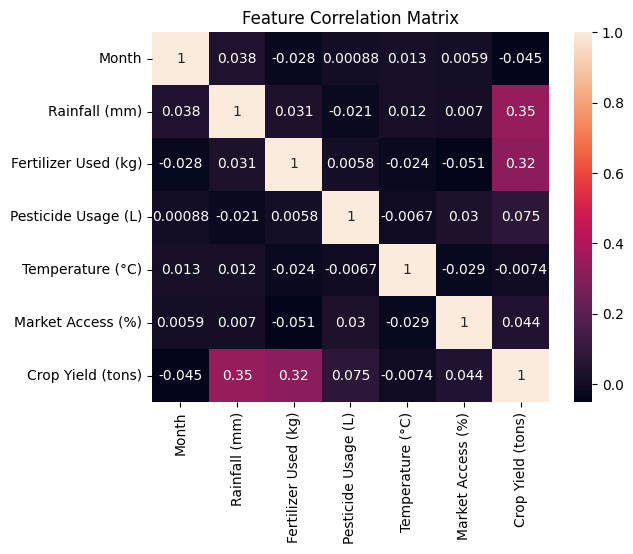

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=[float, int])

# Correlation heatmap
sns.heatmap(numerical_data.corr(), annot=True)
plt.title("Feature Correlation Matrix")
plt.show()

In [21]:
data.columns

Index(['Month', 'Region', 'Crop Type', 'Rainfall (mm)', 'Fertilizer Used (kg)',
       'Pesticide Usage (L)', 'Temperature (°C)', 'Soil Type',
       'Market Access (%)', 'Crop Yield (tons)'],
      dtype='object')

In [22]:
numeric_features = ['Month', 'Region', 'Crop Type', 'Rainfall (mm)', 'Fertilizer Used (kg)',
       'Pesticide Usage (L)', 'Temperature (°C)', 'Soil Type',
       'Market Access (%)', 'Crop Yield (tons)']

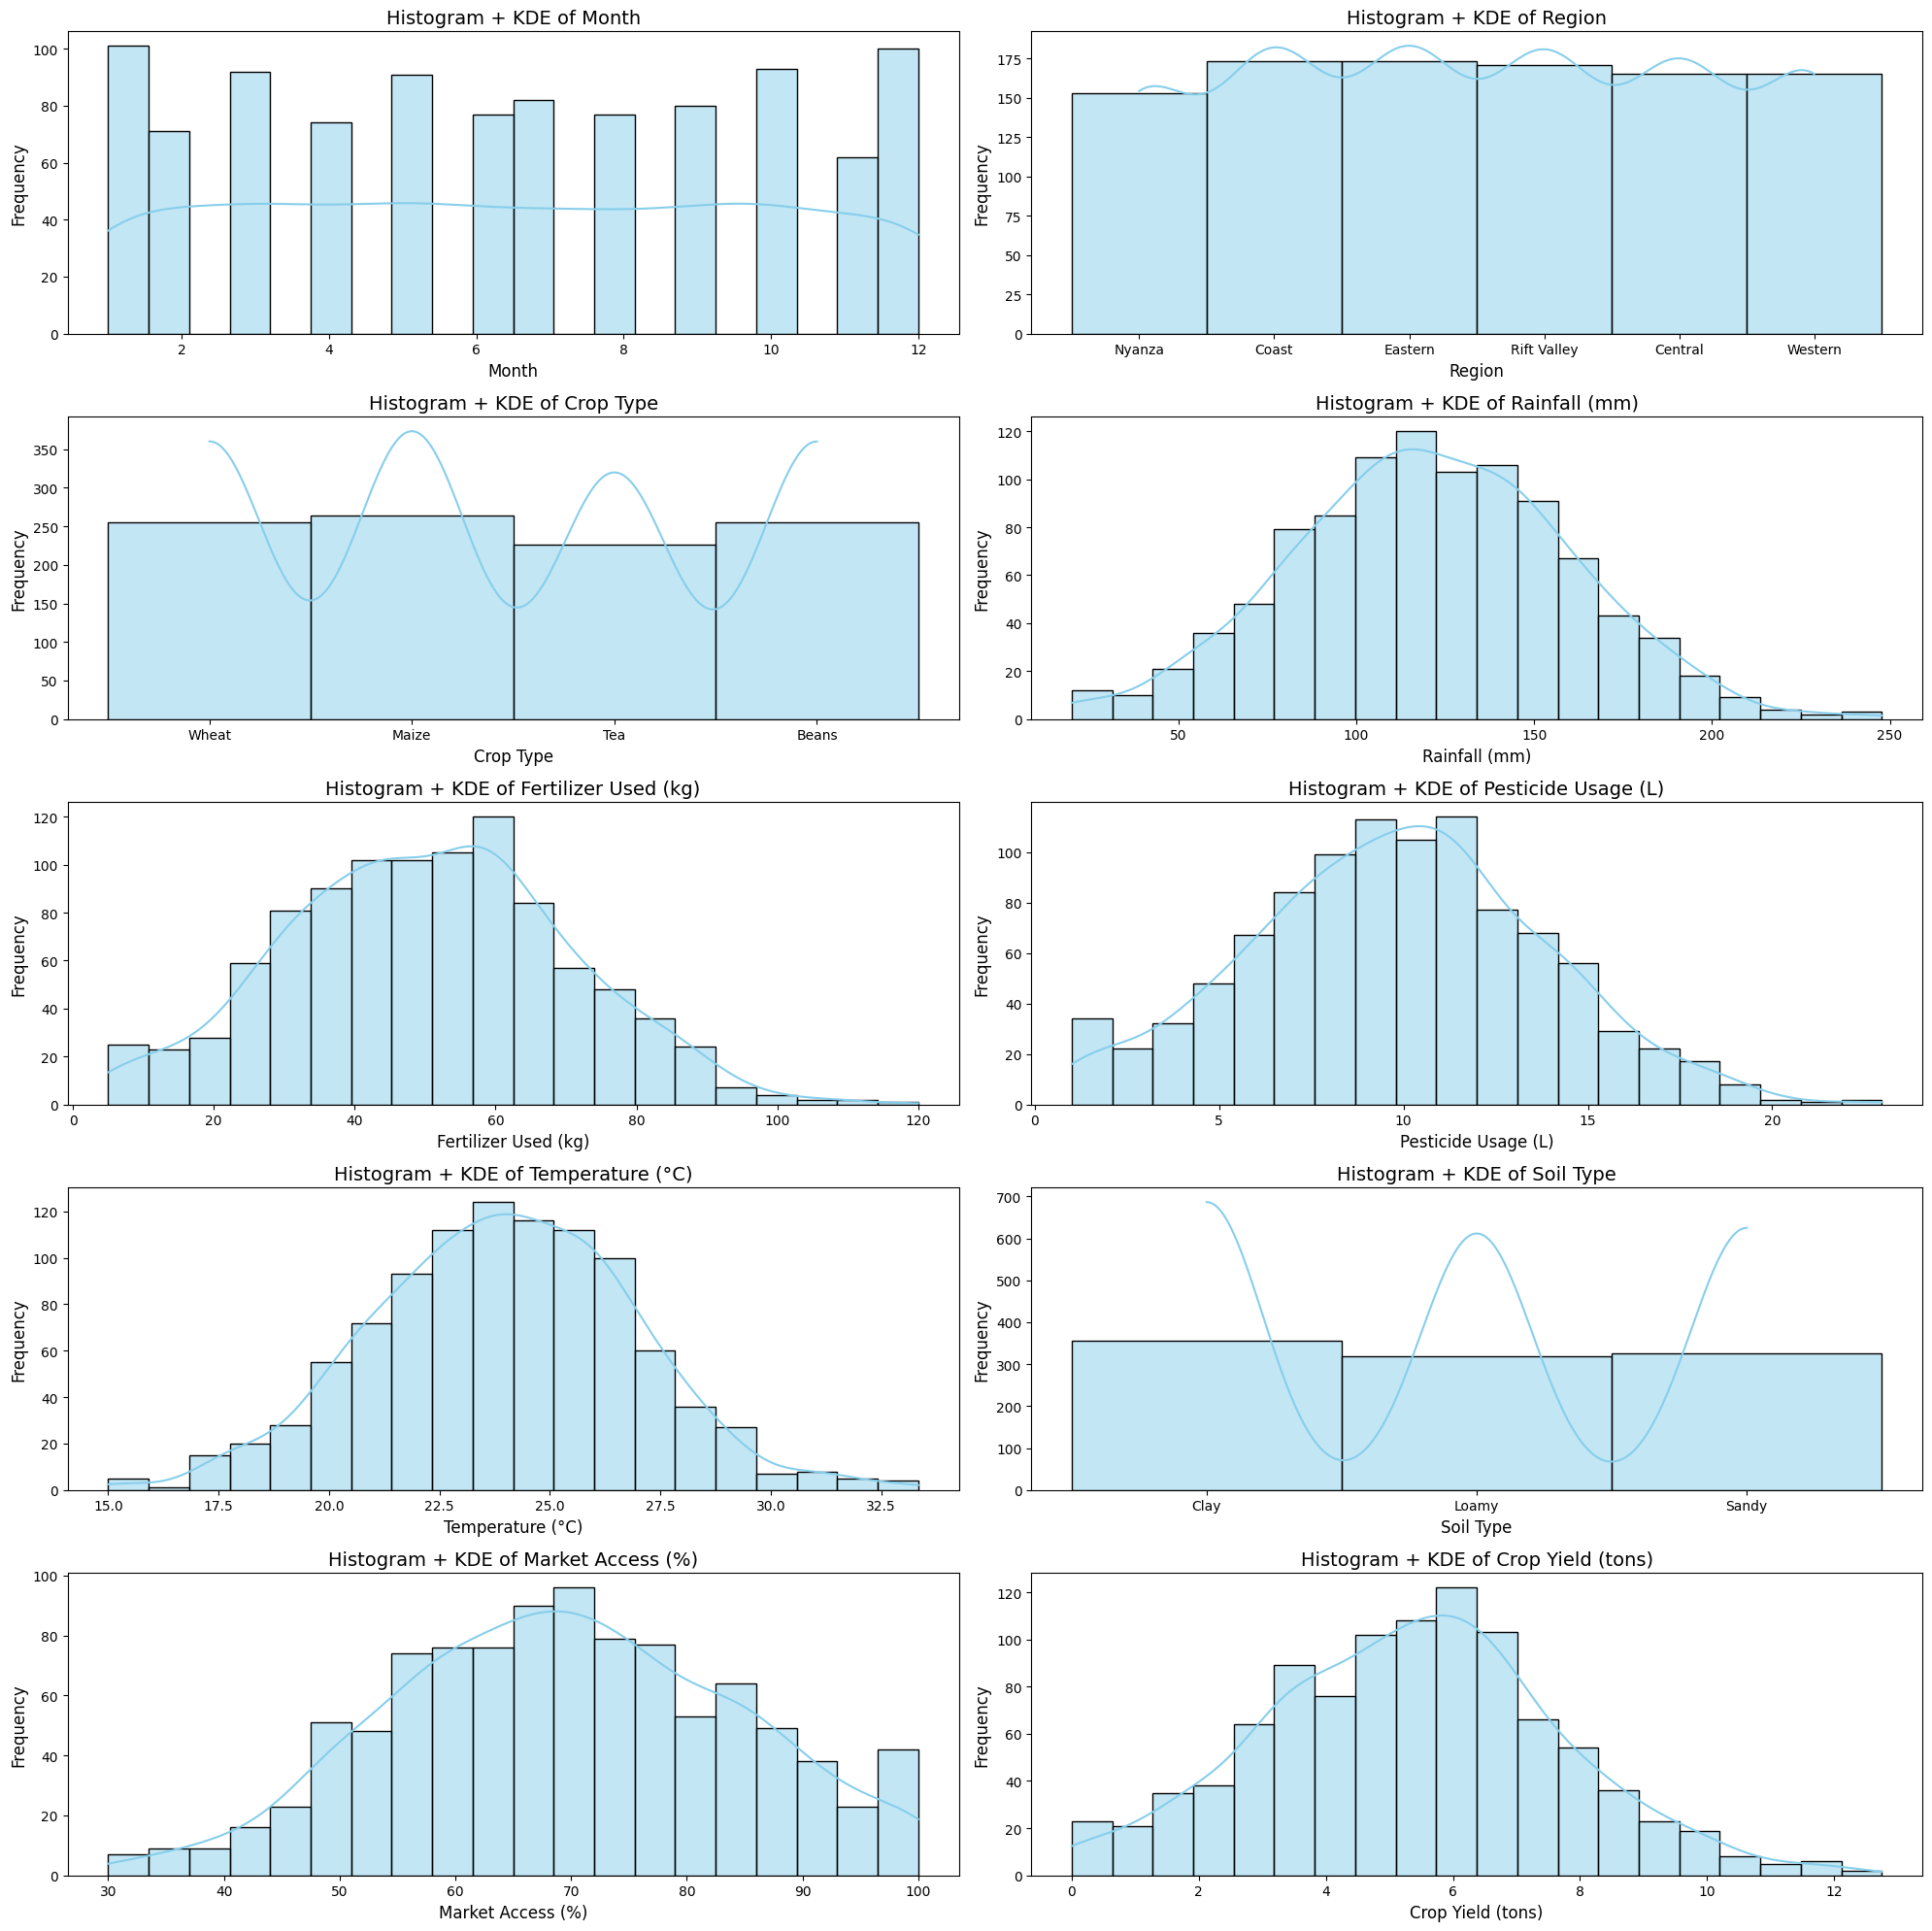

In [25]:
plt.figure(figsize=(20, 20))  # Adjusted figure size for more rows

for i, feature in enumerate(numeric_features):
    plt.subplot(5, 2, i+1) # Changed subplot layout to 5 rows and 2 columns
    sns.histplot(data[feature], kde=True, bins=20, color="skyblue")
    plt.title(f"Histogram + KDE of {feature}", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.show()

##Preprocessing

Handle categorical data(one-hot encoding)

In [27]:
categoricals = ['Region', 'Crop Type', 'Soil Type']
df_encoded = pd.get_dummies(data, columns=categoricals, drop_first=True)


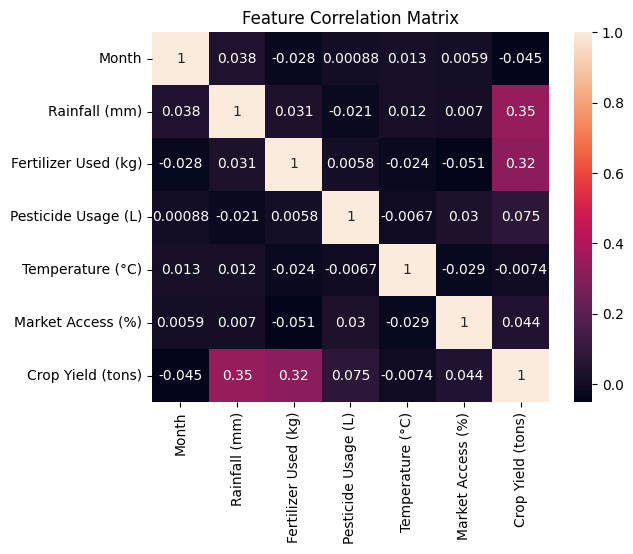

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=[float, int])

# Correlation heatmap
sns.heatmap(numerical_data.corr(), annot=True)
plt.title("Feature Correlation Matrix")
plt.show()

In [30]:
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=[float, int])

# Calculate and display the correlation matrix
display(numerical_data.corr())

,Month,Rainfall (mm),Fertilizer Used (kg),Pesticide Usage (L),Temperature (°C),Market Access (%),Crop Yield (tons)
Month,1.000000,0.037764,-0.027736,0.000883,0.012672,0.005858,-0.045095
Rainfall (mm),0.037764,1.000000,0.030724,-0.020730,0.011930,0.006972,0.345856
Fertilizer Used (kg),-0.027736,0.030724,1.000000,0.005846,-0.024347,-0.050587,0.319872
Pesticide Usage (L),0.000883,-0.020730,0.005846,1.000000,-0.006677,0.029732,0.074752
Temperature (°C),0.012672,0.011930,-0.024347,-0.006677,1.000000,-0.028922,-0.007441
Market Access (%),0.005858,0.006972,-0.050587,0.029732,-0.028922,1.000000,0.043685
Crop Yield (tons),-0.045095,0.345856,0.319872,0.074752,-0.007441,0.043685,1.000000
